<center><h1><span style="color: green;">THỰC HÀNH BUỔI 4</span></h1></center>

# A. PHƯƠNG PHÁP K-NN CHO PHÂN LOẠI NHIỀU LỚP

## Ví dụ A.1

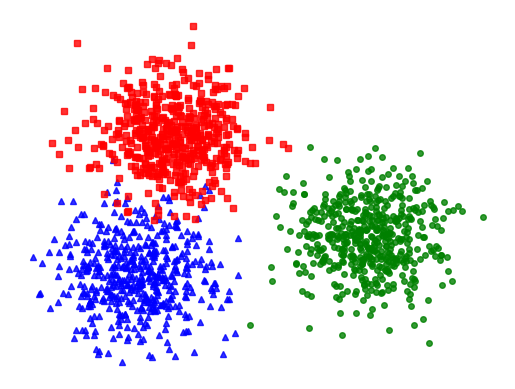

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# randomly generate data
N = 500 # number of training sample
d = 2 # data dimension
C = 3 # number of classes (for c = 0, 1, 2)
means = [[2, 2], [8, 3], [3, 6]] # centeroid of each class dataset
cov = [[1, 0], [0, 1]]

# generate 3 classes of datasets
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix)
X = np.concatenate((X0, X1, X2), axis = 0).T

# Generate label for data points of each class (0, 1, 2)
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    plt.plot(X0[0, :], X0[1,:], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8)
    plt.axis('off')
    plt.plot()
    plt.show()
    
display(X[0:, :], original_label)

In [82]:
X_train = np.concatenate((X0[:400], X1[:400], X2[:400]), axis = 0)
Y_train = np.concatenate((original_label[:400], original_label[500:900],
original_label[1000:1400]), axis = 0)

X_val = np.concatenate((X0[400:], X1[400:], X2[400:]), axis = 0)
Y_val = np.concatenate((original_label[400:500], original_label[900:1000],
original_label[1400:1500]), axis = 0)

print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(1200, 2) (1200,) (300, 2) (300,)


Phân lớp đúng với dữ liệu dự đoán:


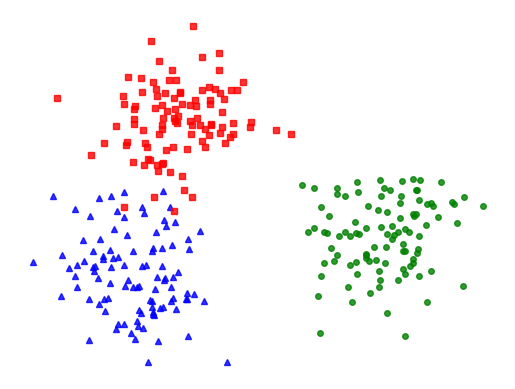

Phân lớp dự đoán:


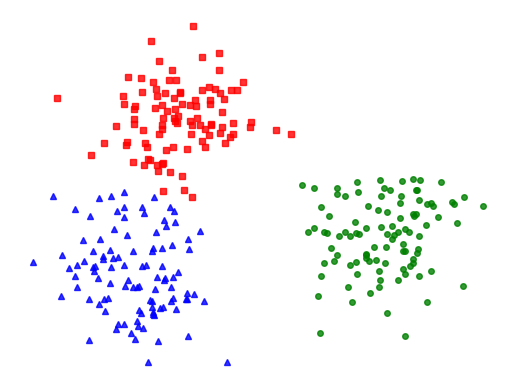

In [83]:
# Hàm tính khoảng cách
def distance(array, value):
    array = np.array(array)
    return np.linalg.norm(array - value, ord = 2, axis=1) # ord = 2 (chuẩn L2 - chuẩn Euclidean); axis=0 tương ứng tính theo cột|axis=1 tính theo hàng

# Hàm tìm k chỉ số gần nhất
def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]

def highest_rank(arr):
    count_num = {}
    for i in arr:
        count_num[i] = arr.count(i)
    return max(count_num, key=count_num.get)

K = 20
y_pred = np.zeros(len(Y_val)).astype(int)
for j in range(len(Y_val)):
    indexes = find_nearest_index(X_train, X_val[j], K)
    y_nearest = []
    for i in range(K):
        y_nearest.append(Y_train[indexes[i] ])

    y_pred[j] = highest_rank(y_nearest)

# print(y_pred)
# print(Y_val)
print("Phân lớp đúng với dữ liệu dự đoán:")
display(X_val.T, Y_val)
print("Phân lớp dự đoán:")
display(X_val.T, y_pred)


Accuracy Score: 0.9867
Precision Score: 0.9868
Recall Score: 0.9867


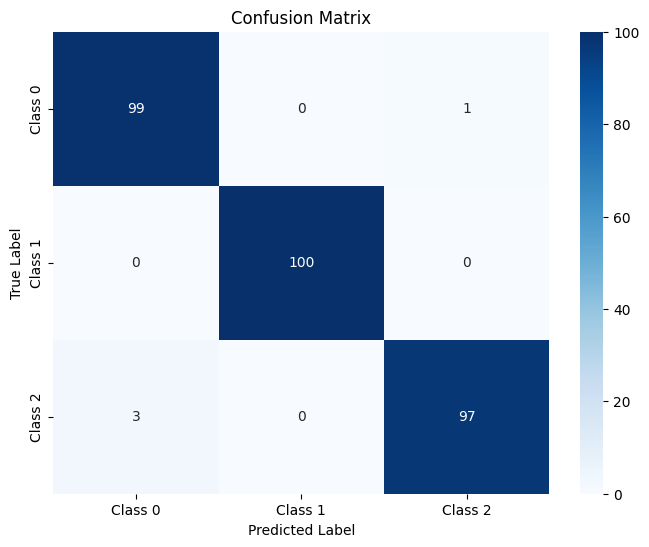

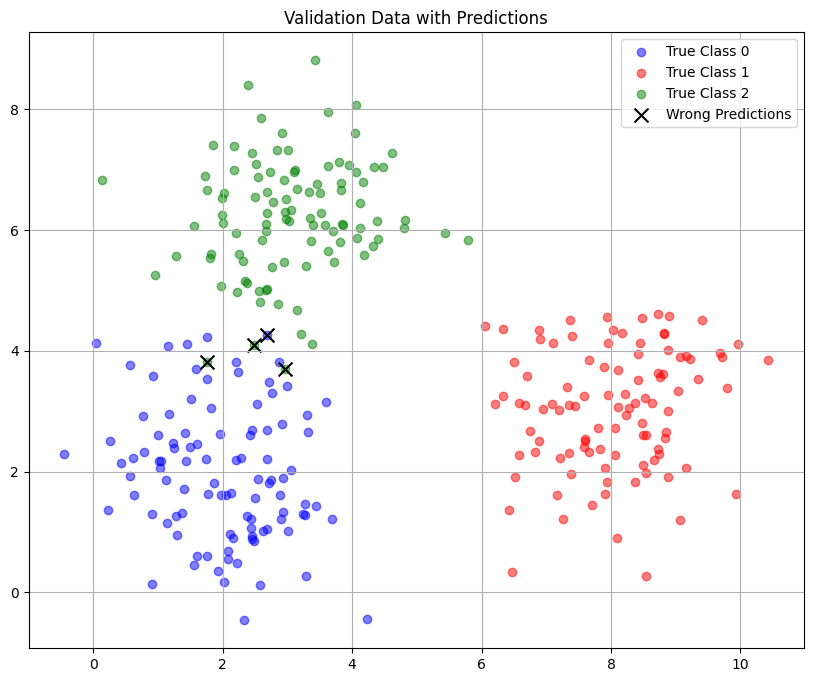

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

# Tính các metric đánh giá
accuracy = accuracy_score(Y_val, y_pred)
precision = precision_score(Y_val, y_pred, average='macro')  # 'macro' để tính trung bình cho tất cả classes
recall = recall_score(Y_val, y_pred, average='macro')

# In kết quả
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")

# Tính và vẽ ma trận nhầm lẫn
cm = confusion_matrix(Y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Thêm biểu đồ scatter để trực quan hóa dữ liệu validation và dự đoán
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']

# Vẽ điểm thực tế
for i in range(3):
    plt.scatter(X_val[Y_val == i, 0], X_val[Y_val == i, 1], 
                c=colors[i], alpha=0.5, label=f'True Class {i}')

# Vẽ các điểm bị dự đoán sai (nếu có)
wrong_pred = Y_val != y_pred
plt.scatter(X_val[wrong_pred, 0], X_val[wrong_pred, 1], 
            c='black', marker='x', s=100, label='Wrong Predictions')

plt.title('Validation Data with Predictions')
plt.legend()
plt.grid(True)
plt.show()

## Ví dụ A.2

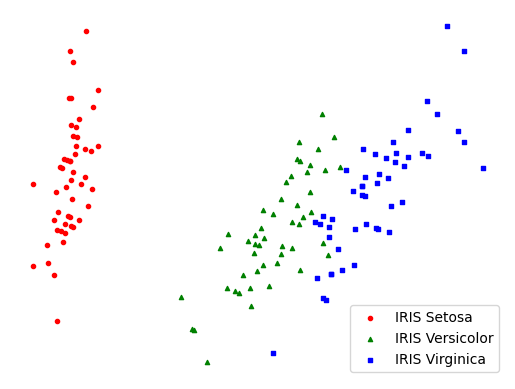

In [85]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# import some data to play wi
iris = datasets.load_iris()
X = iris.data[:, :4] # we take full 4 features
Y = iris.target

# Normalize data
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.axis("off")
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa',
c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',
c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica',
c='blue', marker="s")
plt.legend()
plt.show()

In [86]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu: 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
print("\nTraining set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Training set shape: (120, 4)
Validation set shape: (30, 4)


Phân lớp đúng với dữ liệu dự đoán:


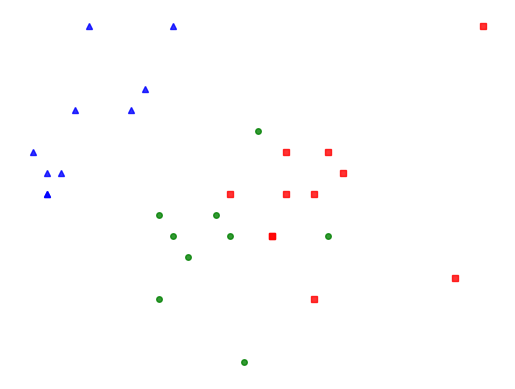

Phân lớp dự đoán:


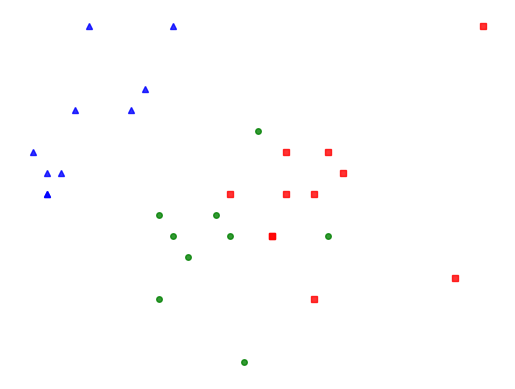

In [87]:
# Hàm tính khoảng cách
def distance(array, value):
    array = np.array(array)
    return np.linalg.norm(array - value, ord = 2, axis=1) # ord = 2 (chuẩn L2 - chuẩn Euclidean); axis=0 tương ứng tính theo cột|axis=1 tính theo hàng

# Hàm tìm k chỉ số gần nhất
def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]

def highest_rank(arr):
    count_num = {}
    for i in arr:
        count_num[i] = arr.count(i)
    return max(count_num, key=count_num.get)

K = 5
y_pred = np.zeros(len(y_val)).astype(int)
for j in range(len(y_val)):
    indexes = find_nearest_index(X_train, X_val[j], K)
    y_nearest = []
    for i in range(K):
        y_nearest.append(y_train[indexes[i] ])

    y_pred[j] = highest_rank(y_nearest)


print("Phân lớp đúng với dữ liệu dự đoán:")
display(X_val.T, y_val)
print("Phân lớp dự đoán:")
display(X_val.T, y_pred)


Accuracy Score: 1.0000
Precision Score: 1.0000
Recall Score: 1.0000


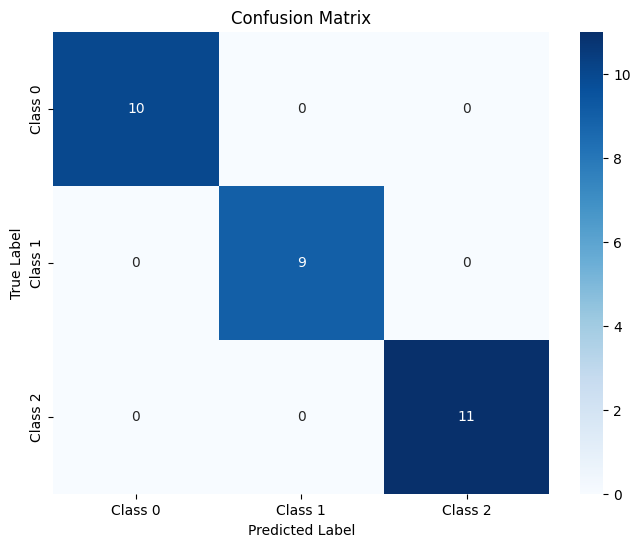

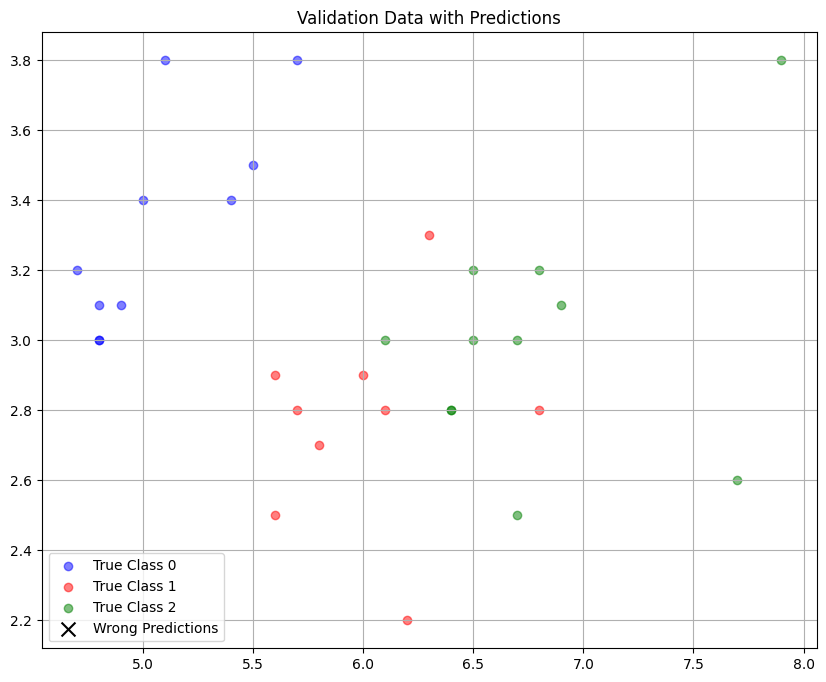

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

# Tính các metric đánh giá
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro')  # 'macro' để tính trung bình cho tất cả classes
recall = recall_score(y_val, y_pred, average='macro')

# In kết quả
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")

# Tính và vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Thêm biểu đồ scatter để trực quan hóa dữ liệu validation và dự đoán
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']

# Vẽ điểm thực tế
for i in range(3):
    plt.scatter(X_val[y_val == i, 0], X_val[y_val == i, 1], 
                c=colors[i], alpha=0.5, label=f'True Class {i}')

# Vẽ các điểm bị dự đoán sai (nếu có)
wrong_pred = y_val != y_pred
plt.scatter(X_val[wrong_pred, 0], X_val[wrong_pred, 1], 
            c='black', marker='x', s=100, label='Wrong Predictions')

plt.title('Validation Data with Predictions')
plt.legend()
plt.grid(True)
plt.show()

# B. HỒI QUY SOFTMAX (MULTINOMIAL LOGISTIC REGRESSION)

## Ví dụ B.1

X shape:  (2, 1500)
label shape:  (1500,)


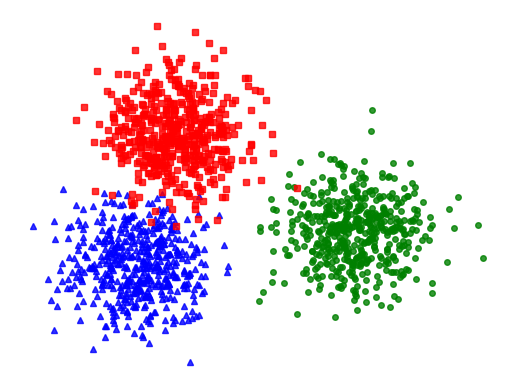

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# randomly generate data
N = 500 # number of training sample
d = 2 # data dimension
C = 3 # number of classes (for c = 0, 1, 2)
means = [[2, 2], [8, 3], [3, 6]] # centeroid of each class dataset
cov = [[1, 0], [0, 1]]

# generate 3 classes of datasets
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix)
X = np.concatenate((X0, X1, X2), axis = 0).T
print("X shape: ", X.shape)

# Generate label for data points of each class (0, 1, 2)
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2
original_label = np.asarray([0]*N + [1]*N + [2]*N).T
print("label shape: ", original_label.shape)

def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    plt.plot(X0[0, :], X0[1,:], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8)
    plt.axis('off')
    plt.plot()
    plt.show()
    
display(X[0:, :], original_label)

In [90]:
from scipy import sparse
def convert_labels(y, C = C):
    """
    convert 1d label to a matrix label: each column of this
    matrix coresponding to 1 element in y. In i-th column of Y,
    only one non-zeros element located in the y[i]-th position,
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return
    [[1, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

Y = convert_labels(original_label, C)
print(Y.shape)

(3, 1500)


In [91]:
def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax(Z):
    """
    #Compute softmax values for each sets of scores in V.
    #each column of V is a set of score.
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W

# cost or loss function
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

# Predict that X belong to which class (1..C now indexed as 0..C-1 )
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

In [92]:
# extended data by add row ONES (equivalent to 1) at first place
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)
print(X.shape)

# W[-1] is the solution, W is all history of weights
eta = .05
d = X.shape[0]
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])

(3, 1500)
[[ 7.21222507 -4.84291238 -5.00335562]
 [-0.52129612  2.19165556 -0.15571122]
 [-1.12517411 -1.22712448  1.97977068]]


(1, 270400)
(3, 270400)


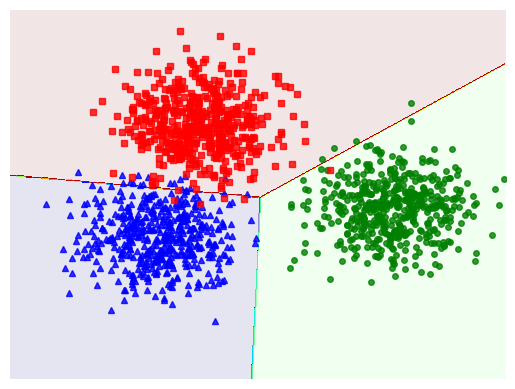

<Figure size 640x480 with 0 Axes>

In [93]:
#Visualize
xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)
print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
print(XX.shape)
Z = pred(W[-1], XX)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)
plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())
display(X[1:, :], original_label)
plt.savefig('ex1.png', bbox_inches='tight', dpi = 300)
plt.show()


Accuracy Score: 0.9833
Precision Score: 0.9861
Recall Score: 0.9819


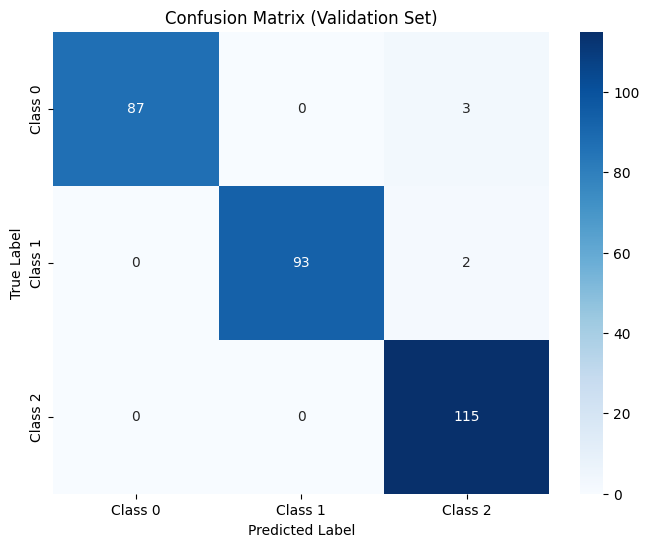

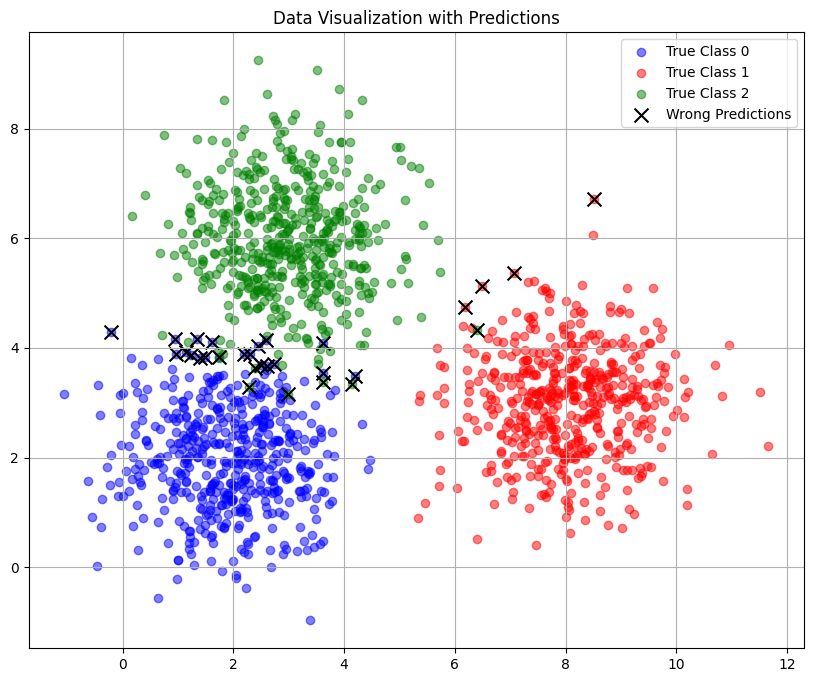

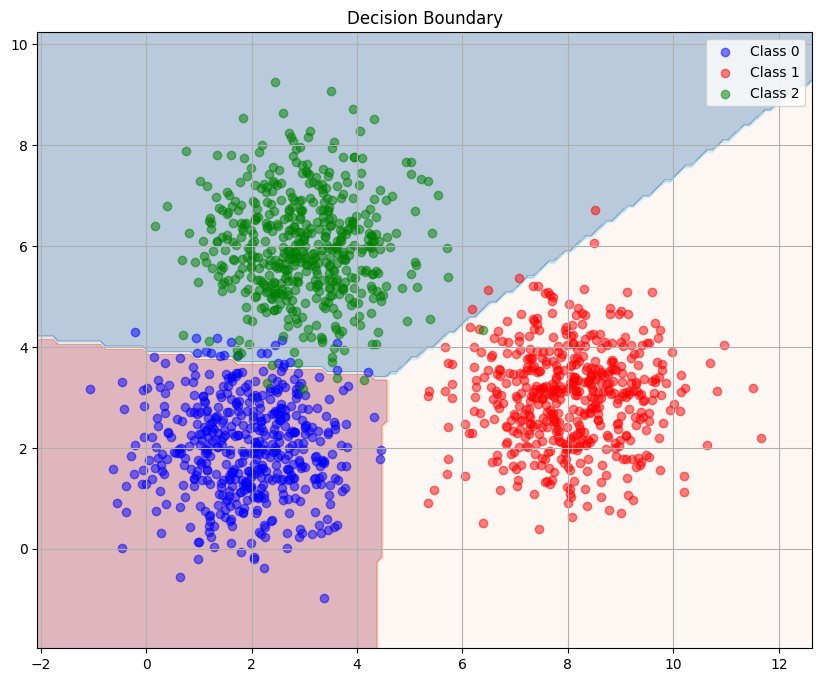

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Chia dữ liệu ngẫu nhiên thành train và validation (80% train, 20% validation)
np.random.seed(42)  # Để kết quả có thể tái hiện
N_total = 3 * N  # Tổng số mẫu
indices = np.random.permutation(N_total)  # Tạo một permutation ngẫu nhiên của các chỉ số
N_train = int(0.8 * N_total)  # Số mẫu cho tập train

# Lấy chỉ số cho train và validation
train_indices = indices[:N_train]
val_indices = indices[N_train:]

# Chia dữ liệu X và nhãn y theo các chỉ số ngẫu nhiên
X_train = X[:, train_indices]
y_train = original_label[train_indices]
X_val = X[:, val_indices]
y_val = original_label[val_indices]

# Dự đoán trên tập validation
y_val_pred = pred(W[-1], X_val)

# Tính các metric đánh giá
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='macro')
recall = recall_score(y_val, y_val_pred, average='macro')

# In kết quả
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")

# Tính và vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix (Validation Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Trực quan hóa dữ liệu và kết quả dự đoán
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']

# Vẽ toàn bộ dữ liệu (không tính hàng bias)
X_plot = X[1:, :]  # Bỏ hàng bias để vẽ 2D
y_all_pred = pred(W[-1], X)

for i in range(C):
    plt.scatter(X_plot[0, original_label == i], X_plot[1, original_label == i],
                c=colors[i], alpha=0.5, label=f'True Class {i}')

# Đánh dấu các điểm dự đoán sai
wrong_pred = original_label != y_all_pred
plt.scatter(X_plot[0, wrong_pred], X_plot[1, wrong_pred],
            c='black', marker='x', s=100, label='Wrong Predictions')

plt.title('Data Visualization with Predictions')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ đường phân cách quyết định (decision boundary)
def plot_decision_boundary(X, W, means):
    x_min, x_max = X[1, :].min() - 1, X[1, :].max() + 1
    y_min, y_max = X[2, :].min() - 1, X[2, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Thêm bias vào grid
    grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()].T
    Z = pred(W, grid)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
    for i in range(C):
        plt.scatter(X[1, original_label == i], X[2, original_label == i],
                   c=colors[i], alpha=0.5, label=f'Class {i}')
    plt.title('Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()

# Gọi hàm vẽ decision boundary
plot_decision_boundary(X, W[-1], means)

## Ví dụ B.2 (Bài tập tự thực hành 1)

### (a) Bài tập tự thực hành 1: Áp dụng chương trình tự xây dựng các hàm/phương thức từ numpy: 

(150, 4)
(150,)


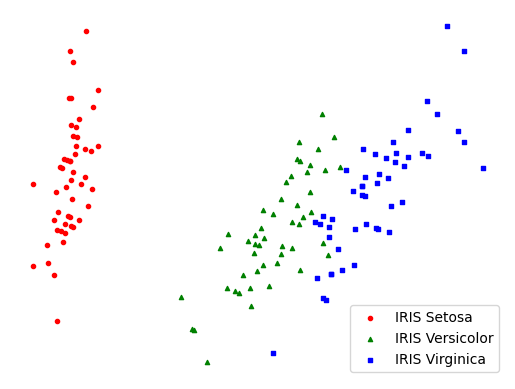

In [95]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

N = 150 # number of training sample
d = 4 # data dimension
C = 3 # number of classes (for c = 0, 1, 2)

# import some data to play wi
iris = datasets.load_iris()
X = iris.data[:, :4] # we take full 4 features
print(X.shape)
label = iris.target
print(label.shape)

# Normalize data
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.axis("off")
plt.scatter(transformed[label==0][0], transformed[label==0][1], s=9, label='IRIS Setosa',
c='red')
plt.scatter(transformed[label==1][0], transformed[label==1][1], s=9, label='IRIS Versicolor',
c='green', marker="^")
plt.scatter(transformed[label==2][0], transformed[label==2][1], s=9, label='IRIS Virginica',
c='blue', marker="s")
plt.legend()
plt.show()

In [96]:
from scipy import sparse
def convert_labels(y, C = C):
    """
    convert 1d label to a matrix label: each column of this
    matrix coresponding to 1 element in y. In i-th column of Y,
    only one non-zeros element located in the y[i]-th position,
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return
    [[1, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

Y = convert_labels(label, C)
print(Y.shape)

(3, 150)


In [97]:
def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax(Z):
    """
    #Compute softmax values for each sets of scores in V.
    #each column of V is a set of score.
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W

# cost or loss function
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

# Predict that X belong to which class (1..C now indexed as 0..C-1 )
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

In [98]:
# extended data by add row ONES (equivalent to 1) at first place
X = np.concatenate((np.ones((1, N)), X.T), axis = 0)
print(X.shape)

# Chia dữ liệu ngẫu nhiên thành train và validation (4 train : 1 validation)
np.random.seed(42)  # Để kết quả có thể tái hiện
N_total = N  # Tổng số mẫu
indices = np.random.permutation(N_total)  # Tạo một permutation ngẫu nhiên của các chỉ số
N_train = int(0.75 * N_total)  # Số mẫu cho tập train

# Lấy chỉ số cho train và validation
train_indices = indices[:N_train]
val_indices = indices[N_train:]

# Chia dữ liệu X và nhãn y theo các chỉ số ngẫu nhiên
X_train = X[:, train_indices]
y_train = label[train_indices]
X_val = X[:, val_indices]
y_val = label[val_indices]

# W[-1] is the solution, W is all history of weights
eta = .05
d = X.shape[0]
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X_train, y_train, W_init, eta)
print(W[-1])

(5, 150)
[[ 0.1466151   1.17649695 -4.14184071]
 [ 2.07847659  1.53514963 -3.50894515]
 [ 4.43628471  1.04603794 -3.5655708 ]
 [-4.65925091 -0.33279552  6.85397475]
 [-2.76807607 -3.52456639  6.39984923]]


Accuracy Score: 1.0000
Precision Score: 1.0000
Recall Score: 1.0000


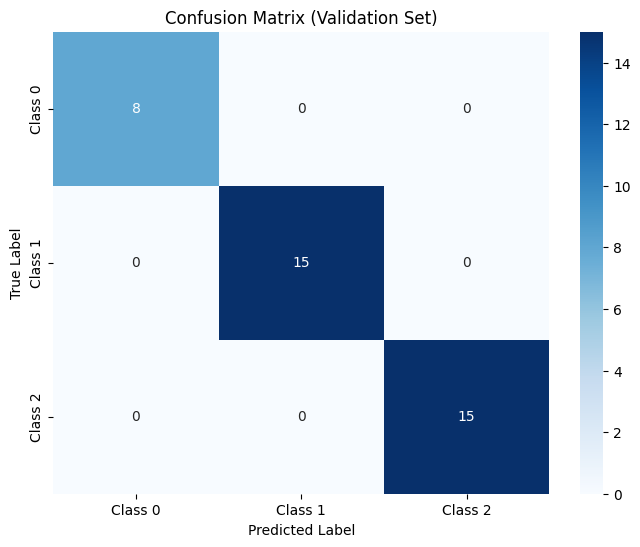

<Figure size 1000x800 with 0 Axes>

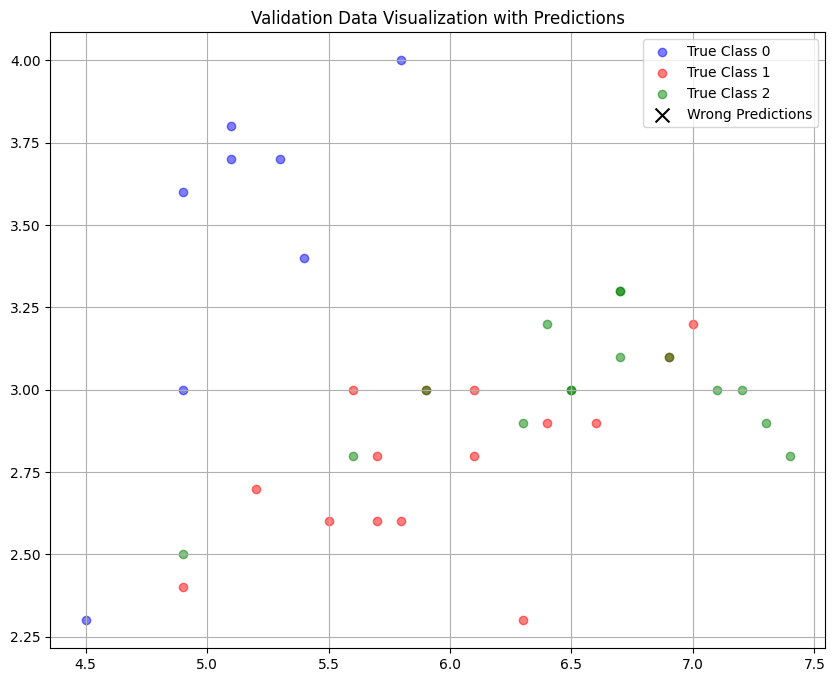

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

# Dự đoán trên tập validation
y_val_pred = pred(W[-1], X_val)

# Tính các metric đánh giá
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='macro')
recall = recall_score(y_val, y_val_pred, average='macro')

# In kết quả
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")

# Tính và vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix (Validation Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Trực quan hóa dữ liệu và kết quả dự đoán
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
# Trực quan hóa dữ liệu và kết quả dự đoán (chỉ với X_val)
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']

# Vẽ dữ liệu validation (không tính hàng bias)
X_val_plot = X_val[1:, :]  # Bỏ hàng bias để vẽ 2D

# Vẽ các điểm dữ liệu validation theo nhãn thật
for i in range(C):
    plt.scatter(X_val_plot[0, y_val == i], X_val_plot[1, y_val == i],
                c=colors[i], alpha=0.5, label=f'True Class {i}')

# Đánh dấu các điểm dự đoán sai trên tập validation
wrong_pred = y_val != y_val_pred
plt.scatter(X_val_plot[0, wrong_pred], X_val_plot[1, wrong_pred],
            c='black', marker='x', s=100, label='Wrong Predictions')

plt.title('Validation Data Visualization with Predictions')
plt.legend()
plt.grid(True)
plt.show()

### (b) Sử dụng thư viện Scikit-Learn

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
iris=load_iris()

# print(iris)
X=iris.data # Observed variable
Y=iris.target # Dependent variable (label)
#print(X.shape)
#print(Y.shape)

# Splitting Train and test Data
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.2,
random_state=2)
#sc=StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.transform(X_test)

# Call to Logistic Regression Model - SAG: solving is based on Stochastic Average Gradient
lorg=LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000)
# and train model by Training Dataset

lorg.fit(X_train,Y_train)

# Then Predict the Test data
Y_pred = lorg.predict(X_test)

Accuracy Score: 0.9667
Precision Score: 0.9630
Recall Score: 0.9583


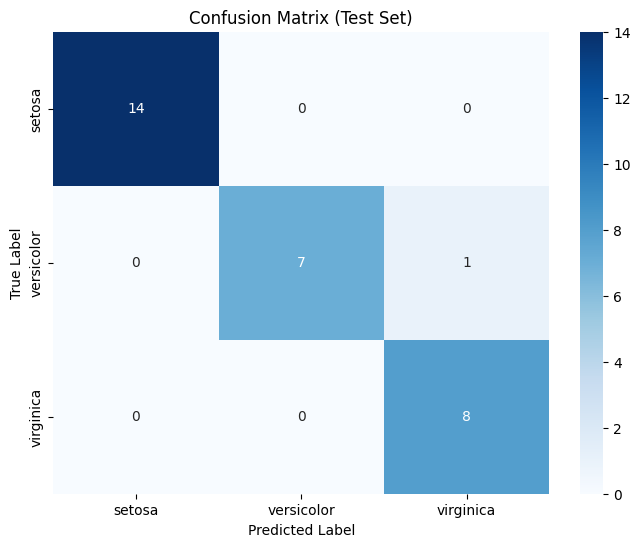

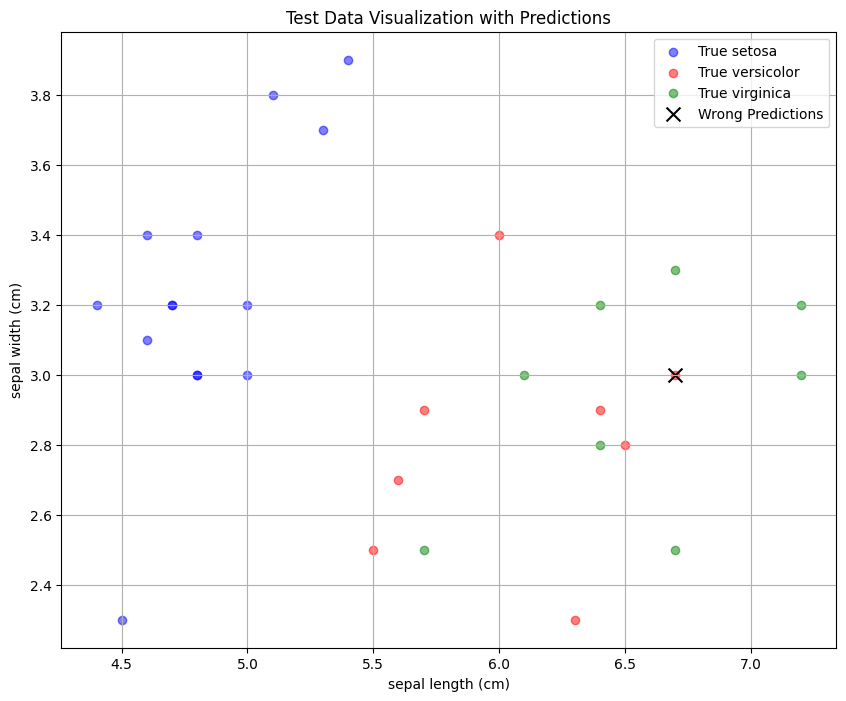

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

# Tính các đại lượng đánh giá
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')  # 'macro' để tính trung bình cho đa lớp
recall = recall_score(Y_test, Y_pred, average='macro')

# In các kết quả
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")

# Tính và vẽ ma trận nhầm lẫn
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix (Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Trực quan hóa dữ liệu và kết quả dự đoán (chỉ với X_test)
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
C = 3  # Số lớp trong Iris dataset

# Vẽ các điểm dữ liệu test theo nhãn thật
for i in range(C):
    plt.scatter(X_test[Y_test == i, 0], X_test[Y_test == i, 1],  # Chọn 2 đặc trưng đầu tiên
                c=colors[i], alpha=0.5, label=f'True {iris.target_names[i]}')

# Đánh dấu các điểm dự đoán sai trên tập test
wrong_pred = Y_test != Y_pred
plt.scatter(X_test[wrong_pred, 0], X_test[wrong_pred, 1],
            c='black', marker='x', s=100, label='Wrong Predictions')

# Thêm tiêu đề và nhãn
plt.title('Test Data Visualization with Predictions')
plt.xlabel(iris.feature_names[0])  # Tên đặc trưng 1: 'sepal length (cm)'
plt.ylabel(iris.feature_names[1])  # Tên đặc trưng 2: 'sepal width (cm)'
plt.legend()
plt.grid(True)
plt.show()

## Ví dụ B.3 (Bài tập tự thực hành 2)

In [102]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.model_selection import train_test_split

n_samples = 500

X, y = fetch_20newsgroups_vectorized(subset='all', return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
 stratify=y, test_size=0.25)

train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]


Accuracy: 0.3200
Precision: 0.3523
Recall: 0.3200


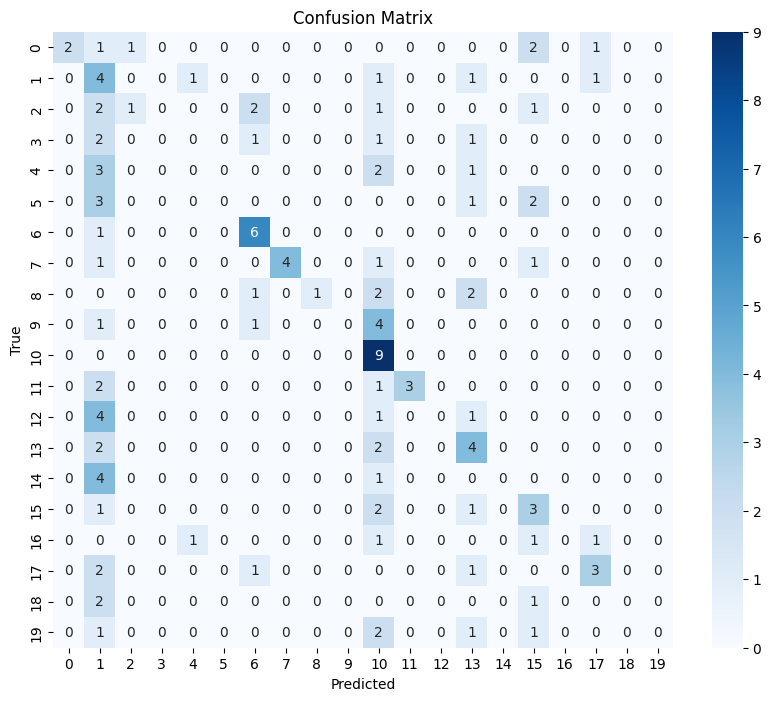

In [103]:
# Import thư viện
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Xây dựng mô hình hồi quy Logistic nhiều lớp
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Tính toán các chỉ số đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# In ra kết quả đánh giá
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Ví dụ B.4 (Bài tập tự thực hành 3)

In [104]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Đọc dữ liệu từ file CSV
file_data = 'glass.csv'
glass_df = pd.read_csv(file_data)
X_1 = glass_df[glass_df.columns[:-1]].values  # Các đặc trưng
y_1 = glass_df['Type'].values  # Nhãn lớp

from sklearn.preprocessing import LabelEncoder

# Mã hóa lại nhãn
label_encoder = LabelEncoder()
y_1 = label_encoder.fit_transform(glass_df['Type'].values)  # Mã hóa nhãn về dạng liên tục từ 0

# Phân chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.25, random_state=42)

# Chuyển nhãn thành one-hot encoding
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y.astype(int)]

num_classes = len(np.unique(y_1))  # Số lớp (7 loại kính)
y_train_one_hot = one_hot_encode(y_train, num_classes)
y_test_one_hot = one_hot_encode(y_test, num_classes)

In [105]:
# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hàm softmax
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Tránh hiện tượng tràn số
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Hàm tính loss (cross-entropy)
def compute_loss(X, y, W, b):
    m = X.shape[0]
    A = softmax(np.dot(X, W) + b)
    loss = -np.sum(y * np.log(A + 1e-10)) / m  # Đảm bảo tránh log(0)
    return loss

# Hàm cập nhật trọng số (Gradient Descent)
def update_parameters(X, y, W, b, learning_rate=0.01):
    m = X.shape[0]
    A = softmax(np.dot(X, W) + b)
    
    dW = np.dot(X.T, (A - y)) / m
    db = np.sum(A - y, axis=0) / m
    
    W -= learning_rate * dW
    b -= learning_rate * db
    
    return W, b

# Hàm huấn luyện mô hình
def train_logistic_regression(X_train, y_train, num_classes, epochs=1000, learning_rate=0.01):
    m, n = X_train.shape
    W = np.zeros((n, num_classes))  # Trọng số, kích thước (số đặc trưng, số lớp)
    b = np.zeros((1, num_classes))  # Bias, kích thước (1, số lớp)
    
    loss_history = []
    
    for i in range(epochs):
        W, b = update_parameters(X_train, y_train, W, b, learning_rate)
        
        if i % 100 == 0:
            loss = compute_loss(X_train, y_train, W, b)
            loss_history.append(loss)
            print(f"Epoch {i}, Loss: {loss}")
    
    return W, b, loss_history

Epoch 0, Loss: 9.993686576411955
Epoch 100, Loss: 10.509610397605512
Epoch 200, Loss: 8.365988263143601
Epoch 300, Loss: 4.671894799191838
Epoch 400, Loss: 3.5664573398145536
Epoch 500, Loss: 3.1165379236752955
Epoch 600, Loss: 1.5082209786628078
Epoch 700, Loss: 2.8405316222259867
Epoch 800, Loss: 1.4826679849561342
Epoch 900, Loss: 0.900324097255122
Accuracy: 87.04%


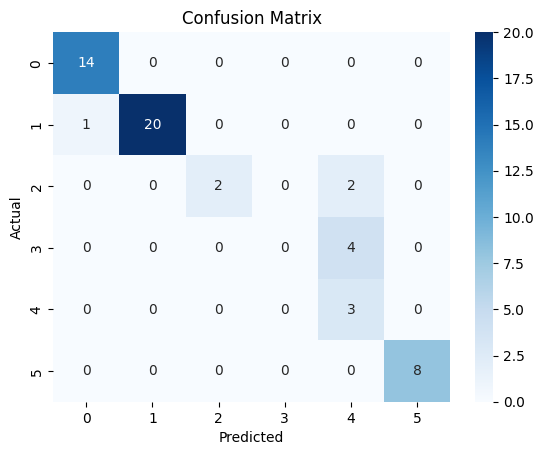

In [106]:
# Huấn luyện mô hình
W, b, loss_history = train_logistic_regression(X_train, y_train_one_hot, num_classes)

# Hàm dự đoán
def predict(X, W, b):
    A = softmax(np.dot(X, W) + b)
    return np.argmax(A, axis=1)

# Dự đoán trên tập kiểm tra
y_pred = predict(X_test, W, b)

# Tính độ chính xác
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Ma trận confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_1), yticklabels=np.unique(y_1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Ví dụ 4 (Bài tập tự thực hành 4)

In [107]:
import os
import numpy as np

# set names to the paths because they're too long
data_path = 'handwritting'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')


In [108]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')

    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)

    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)

    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)

    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)

    labels = np.zeros((real_num)).astype(np.int64)

    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)

        images = images[rand_id, :]
        labels = labels[rand_id,]

    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

# Gọi phương thức đọc dữ liệu để kiếm tra xem đọc đúng hay không:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(  test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(5000, 784) (5000,)
(10000, 784) (10000,)


In [109]:
# Convert matrix to image
def get_image(image):
    return image.reshape(28, 28)

def convert_labels(y, C):
    from scipy import sparse
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

def _softmax_regression(X, Y, theta, lambda_=0.5, iterations=20, learning_rate=1e-5, batch_size=200):
    from sklearn.metrics import log_loss

    losses = []
    _theta = theta
    d, N = X.shape

    for iter_ in range(iterations):
        shuffle_index = np.random.permutation(N)
        for i in shuffle_index:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(10, 1)
            ai = softmax_stable(np.dot(_theta.T, xi))
            _theta += learning_rate * xi.dot((yi - ai).T)
            if (iter_ * N + i) % batch_size == 0:
                Y_hat = np.dot(_theta.T, X)
                losses.append(log_loss(Y, Y_hat))

        Y_hat = np.dot(_theta.T, X)
        print(f"epoch {iter_} - cost {log_loss(Y, Y_hat) / N}")

    return _theta, losses


5 9


<Figure size 640x480 with 0 Axes>

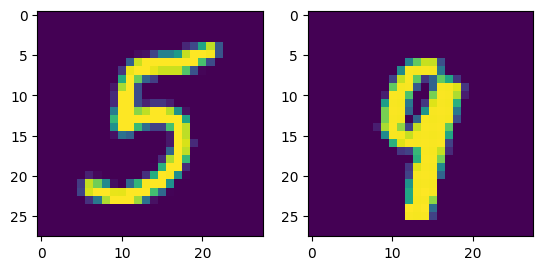

In [110]:
# for display and test digit :D
import random
import matplotlib.pyplot as plt

index = random.randint(0, 1000)
print(train_labels[index], test_labels[index])

train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

In [111]:
# Chuẩn bị dữ liệu huấn luyện
X_train = np.concatenate((np.ones((1, train_images.shape[0])), train_images.T), axis = 0)
Y_train = convert_labels(train_labels, 10)
print(X_train.shape)
print(Y_train.shape)

theta = np.zeros((X_train.shape[0], 10))
opt_theta, losses = _softmax_regression(X_train, Y_train, theta)
print('training success: ', opt_theta.shape, len(losses))

from sklearn.metrics import accuracy_score
print('accuracy training data: ', accuracy_score(train_labels, pred(opt_theta, X_train)))
# test_images, test_labels = get_mnist_data(
# test_images_path, test_labels_path, 1000, _is=False, shuffle=False)
X_test = np.concatenate((np.ones((1, test_images.shape[0])), test_images.T), axis = 0)
print(X_test.shape)
print('accuracy testing data: ', accuracy_score(test_labels,
pred(opt_theta, X_test)))


(785, 5000)
(10, 5000)
epoch 0 - cost 0.0317184149824231
epoch 1 - cost 0.017300953626776253
epoch 2 - cost 0.011587503903498438
epoch 3 - cost 0.009371349881170481
epoch 4 - cost 0.007208730677823454
epoch 5 - cost 0.007208730677823454
epoch 6 - cost 0.006487857610041109
epoch 7 - cost 0.005769545869815911
epoch 8 - cost 0.003604365338911737
epoch 9 - cost 0.003604365338911737
epoch 10 - cost 0.0036651978225358144
epoch 11 - cost 0.005046111474476423
epoch 12 - cost 0.0021626192033470507
epoch 13 - cost 0.0028834922711293938
epoch 14 - cost 0.0028834922711293946
epoch 15 - cost 0.0028834922711293946
epoch 16 - cost 0.003604365338911738
epoch 17 - cost 0.0021626192033470507
epoch 18 - cost 0.0028834922711293938
epoch 19 - cost 0.0021626192033470507
training success:  (785, 10) 500
accuracy training data:  0.928
(785, 10000)
accuracy testing data:  0.8576
